## Project
### 1. Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

# Online Retail Data Set 

Dataset from UCI - Machine Learning Repository

https://archive.ics.uci.edu/ml/datasets/Online+Retail

In [43]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# read excel, using xls as it reads in faster
df = pd.read_excel("Online-Retail.xls")
# investigate the shape
df.shape

(65535, 8)

In [45]:
# a look at the first 10 rows
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Let's look at the summary statistics

Looking at the summary statistics we can quickly see some issues. 
- Quantity has negative values
- Unit price has values of zero. 

In [46]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,65535.000000,65535.000000,40218.000000
mean,8.363119,5.856143,15384.033517
std,413.694482,145.755953,1766.863499
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,14001.000000
50%,2.000000,2.510000,15358.000000
75%,8.000000,4.240000,17019.000000
max,74215.000000,16888.020000,18283.000000


### Cleaning the data

- Check for missing values and removing those rows.
- Check for negative values
- Check for duplicates
- Check for Unit Price equals to 0

#### Finding missing Values and removing them

In [41]:
# check for null values
# There are null values in Customer ID and Description
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [60]:
# removing rows with missing values/null values, any negative quanitities, unit price less than than 1.
df = df[df.CustomerID.notnull() & (df.Quantity > 0) & (df.UnitPrice > 0)]
# drop rows with missing value
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


### Removing Duplicates

In [61]:
# viewing the duplicates
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
587,536412,22273,FELTCRAFT DOLL MOLLY,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
589,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,2010-12-01 11:49:00,3.75,17920.0,United Kingdom
594,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2010-12-01 11:49:00,2.10,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,2010-12-01 11:49:00,1.65,17920.0,United Kingdom
600,536412,22569,FELTCRAFT CUSHION BUTTERFLY,2,2010-12-01 11:49:00,3.75,17920.0,United Kingdom


In [62]:
# This will remove duplicates
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop_duplicates.html
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [64]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,39184.000000,39184.000000,39184.000000
mean,14.616246,3.127486,15393.779527
std,378.059152,5.251979,1769.074797
min,1.000000,0.070000,12346.000000
25%,2.000000,1.250000,14030.000000
50%,5.000000,1.950000,15373.000000
75%,12.000000,3.750000,17059.000000
max,74215.000000,295.000000,18283.000000


### 2. Investigate the types of variables involved, their likely distributions, and their relationships with each other.

Exploratory Data Analysis

### Quantity 
The Quantity variable is a numeric variable. Negative integers have been removed. 

In [66]:
np.unique(df['Quantity'])

array([    1,     2,     3,     4,     5,     6,     7,     8,     9,
          10,    11,    12,    13,    14,    15,    16,    17,    18,
          19,    20,    21,    22,    23,    24,    25,    26,    27,
          28,    29,    30,    31,    32,    34,    36,    37,    38,
          39,    40,    41,    42,    47,    48,    50,    52,    53,
          54,    56,    60,    62,    64,    69,    70,    72,    75,
          76,    78,    80,    84,    89,    90,    96,   100,   108,
         110,   114,   120,   128,   144,   147,   150,   156,   160,
         168,   176,   180,   186,   192,   200,   204,   208,   216,
         240,   250,   252,   256,   270,   272,   288,   300,   320,
         324,   360,   378,   384,   400,   402,   408,   432,   480,
         500,   576,   600,   648,   670,   720,   860,   960,   972,
        1000,  1008,  1010,  1284,  1296,  1300,  1356,  1394,  1400,
        1440,  1488,  1728,  1824,  1930,  2000,  2400,  2880,  3114,
       74215])

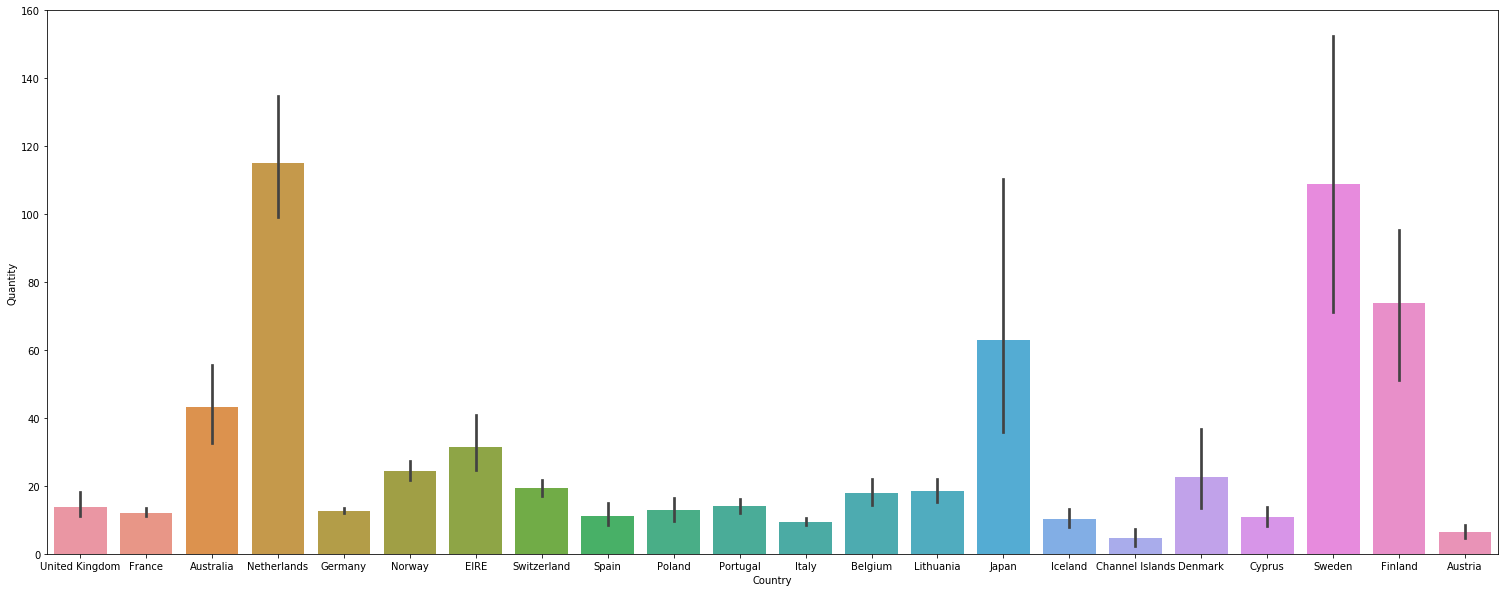

In [81]:
plt.figure(figsize=(26, 10))

plot.set_title('Country by Quantity',fontsize=20)
plot.set_ylabel('Quantity',fontsize=20)
plot.set_xlabel('Country',fontsize=20)
plot = sns.barplot(df['Country'], df['Quantity'])

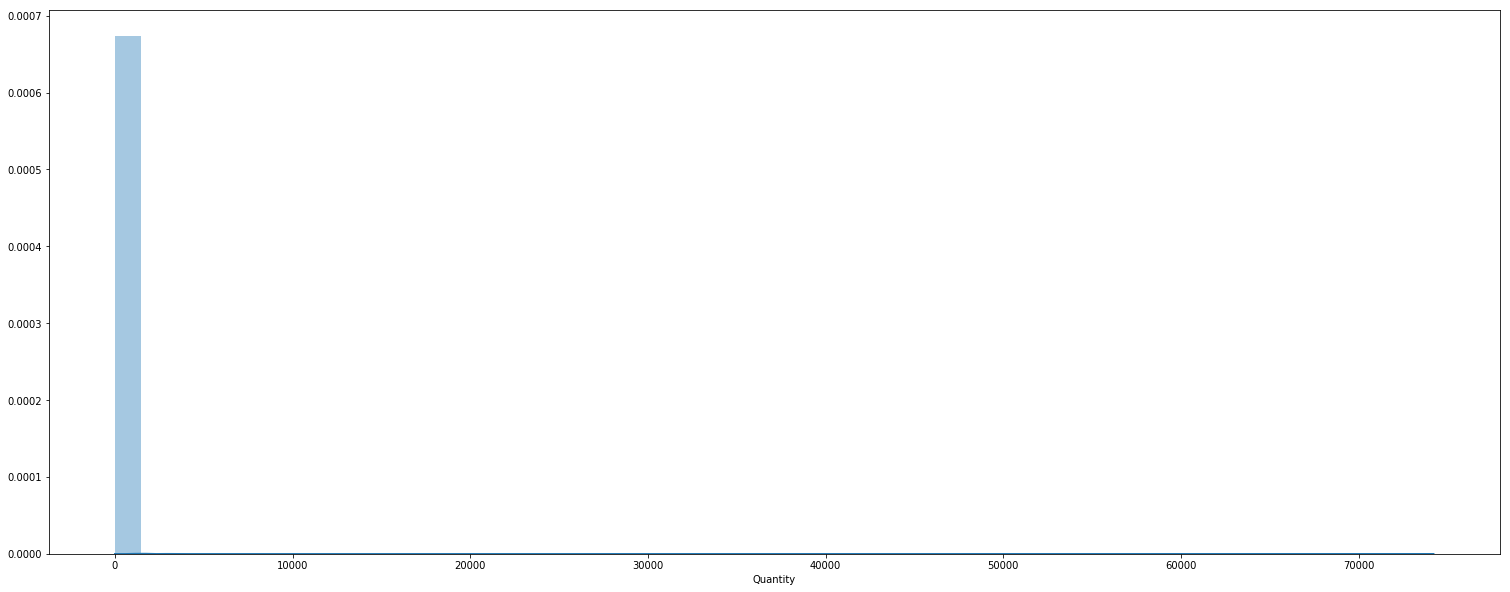

In [69]:
%matplotlib inline

plt.figure(figsize=(26, 10))

sns.distplot(df['Quantity'])

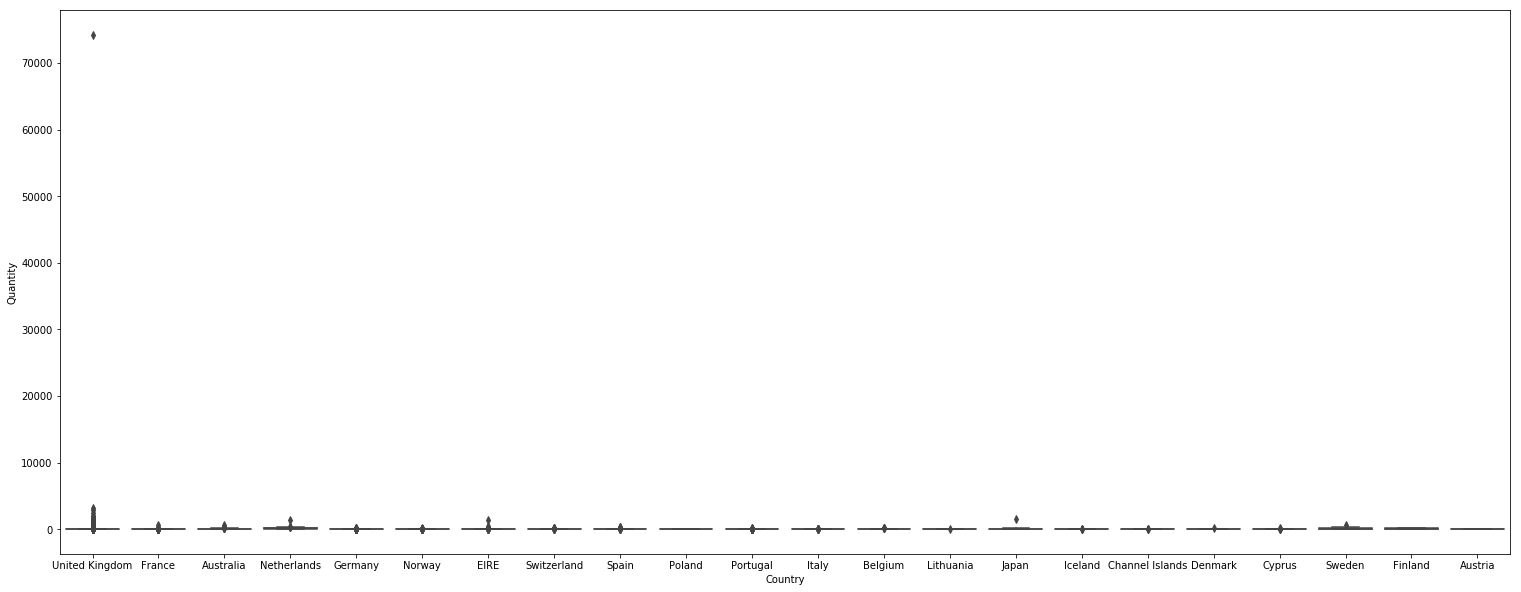

In [82]:
%matplotlib inline
plt.figure(figsize=(26, 10))
sns.boxplot(df['Country'], df['Quantity'])

### A look at the Country column

This variable is Nominal variable as there is more than two variables. There are 22 countries in total.

In [84]:
#number of countries in the dataset
myArray = np.unique(df['Country'])
len(myArray)

22

In [85]:
# Show me the unique country varibales
# https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.unique.html
np.unique(df['Country'])

array(['Australia', 'Austria', 'Belgium', 'Channel Islands', 'Cyprus',
       'Denmark', 'EIRE', 'Finland', 'France', 'Germany', 'Iceland',
       'Italy', 'Japan', 'Lithuania', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype=object)

### A look at the InvoiceDate column

This variable is a timeseries and the data is taken over a period of two months, December 2010 to January 2011

In [87]:
# add a new column for date 
# convert date column to date time + add new column
df['Date'] = pd.to_datetime(df['InvoiceDate'])

# create a new column for month
df['Month'] = df['Date'].dt.strftime('%b %Y')

#investigating the time series of the data
df['Month'].unique()

array(['Dec 2010', 'Jan 2011'], dtype=object)

In [88]:
# What is the Total Cost 
df['Total Cost'] =  df['UnitPrice'] * df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month,Total Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,Dec 2010,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,Dec 2010,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,Dec 2010,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,Dec 2010,54.08


### Investigating which Country had the biggest Revenue

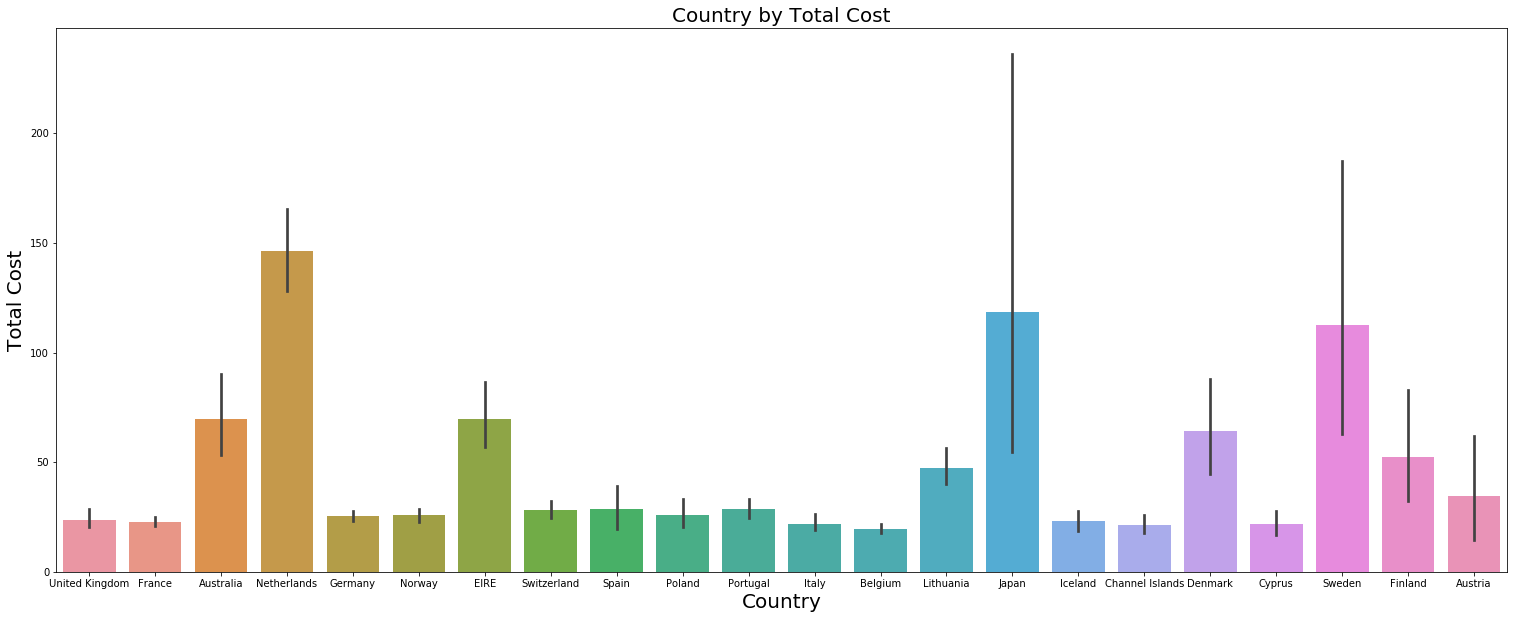

In [89]:
%matplotlib inline


plt.figure(figsize=(26, 10))
plot = sns.barplot(df['Country'], df['Total Cost'])

plot.set_title('Country by Total Cost',fontsize=20)
plot.set_ylabel('Total Cost',fontsize=20)
plot.set_xlabel('Country',fontsize=20)

plot

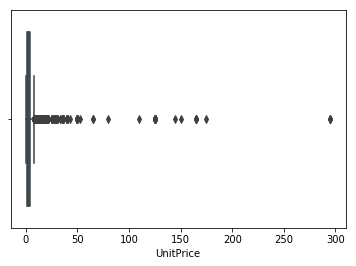

In [90]:
x = df['UnitPrice']
sns.boxplot(x)


References:
    
    
https://realpython.com/python-data-cleaning-numpy-pandas/

https://cmdlinetips.com/2018/02/how-to-subset-pandas-dataframe-based-on-values-of-a-column/

https://bigdata-madesimple.com/step-by-step-approach-to-perform-data-analysis-using-python/

https://www.oreilly.com/learning/handling-missing-data